<a href="https://colab.research.google.com/github/theAkhileshRai/DeepLearning/blob/master/Pytorch_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch object use Cuda

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# check for GPU with Pytorch

import torch
torch.cuda.is_available()

False

In [4]:
# Device Agnostic code
device  = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
tensor1 = torch.tensor([1,23,34])
tensor1

tensor([ 1, 23, 34])

In [6]:
tensor_on_gpu = tensor1.to(device)
tensor_on_gpu

tensor([ 1, 23, 34])

In [7]:
## Numpy
tensor_on_gpu.cpu().numpy()

array([ 1, 23, 34])

## Exercises and Curriculum

In [8]:
torch.rand([7,7])

tensor([[0.0724, 0.6260, 0.5220, 0.5548, 0.7931, 0.7759, 0.3983],
        [0.2281, 0.7557, 0.2888, 0.2416, 0.4297, 0.2091, 0.5836],
        [0.1640, 0.9959, 0.1764, 0.0686, 0.7623, 0.5969, 0.9361],
        [0.3387, 0.3289, 0.1832, 0.3434, 0.0939, 0.4463, 0.2008],
        [0.3336, 0.0795, 0.2329, 0.7153, 0.4305, 0.5733, 0.3042],
        [0.8201, 0.0491, 0.5107, 0.5835, 0.1405, 0.8160, 0.3013],
        [0.0636, 0.0572, 0.4944, 0.3847, 0.2936, 0.1722, 0.3261]])

In [9]:
random_seed = 42
SEED = torch.manual_seed(random_seed)
a = torch.rand([7,7])
b = torch.rand([7,7])
torch.matmul(a,b)

tensor([[2.6637, 2.0426, 3.2242, 0.8659, 1.6420, 1.8317, 2.0220],
        [3.0324, 2.3639, 3.7553, 0.7506, 1.6955, 2.3543, 2.2479],
        [2.0545, 1.8111, 2.4874, 1.1800, 1.3461, 1.6582, 1.6263],
        [1.2061, 1.2405, 1.5288, 0.9969, 0.9076, 1.1420, 1.0550],
        [1.7111, 1.7710, 2.1770, 1.2673, 1.0596, 1.9356, 1.3243],
        [2.2473, 2.0134, 2.7834, 1.2568, 1.5264, 1.8804, 1.8302],
        [2.5960, 2.5335, 3.4685, 1.3261, 1.7587, 2.5078, 2.1685]])

# Pytorch Workflow

### 1. Data (prepare and load)
### 2. Build Model
### 3. Fit the model to the data (training)
### 4. Evaluate the model (test)
### 5. Deploy on Azure

In [11]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
torch.__version__



'2.3.0+cu121'

In [14]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED) #w=100
X = torch.rand(1,100).mul(100).floor()
y = X + 10

In [15]:
X,y

(tensor([[88., 91., 38., 95., 39., 60., 25., 79., 94., 13., 93., 59., 86., 56.,
          74., 42., 88., 57., 26., 62., 26., 44., 29., 83., 10., 26., 35., 19.,
          54.,  0., 95.,  7., 88., 58., 33., 80., 57., 90., 55., 34., 63., 36.,
          71., 94., 78., 28., 78., 58., 75., 19.,  0., 30., 11., 91., 64., 70.,
          65., 49., 89., 14., 53., 15., 65., 32., 65., 39., 91., 20., 20., 20.,
          94., 66., 98.,  8.,  0., 10., 16., 70., 67., 91., 24., 15., 76., 29.,
          80., 38., 78., 11., 24., 65., 60., 37., 79., 83., 13., 23., 95., 33.,
          32.,  1.]]),
 tensor([[ 98., 101.,  48., 105.,  49.,  70.,  35.,  89., 104.,  23., 103.,  69.,
           96.,  66.,  84.,  52.,  98.,  67.,  36.,  72.,  36.,  54.,  39.,  93.,
           20.,  36.,  45.,  29.,  64.,  10., 105.,  17.,  98.,  68.,  43.,  90.,
           67., 100.,  65.,  44.,  73.,  46.,  81., 104.,  88.,  38.,  88.,  68.,
           85.,  29.,  10.,  40.,  21., 101.,  74.,  80.,  75.,  59.,  99.,  24.,
       

In [22]:
X.numpy()[0][0]

88.0

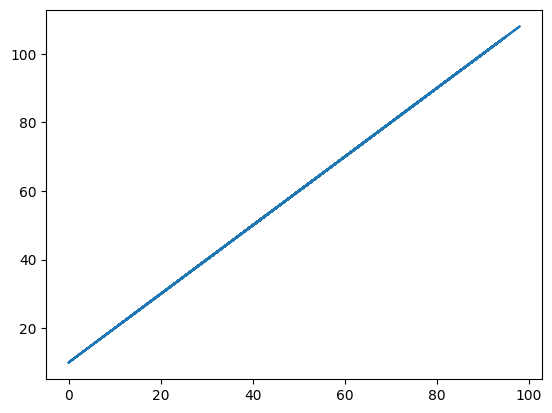

In [23]:
plt.plot(X.numpy()[0],y.numpy()[0])
plt.show()

In [27]:
len(X[0])

100

In [26]:
train_splot = 0.8
train_size = int(train_splot*len(X[0]))
train_size

80

In [29]:
X_train,y_train = X[0][:train_size],y[:train_size]
X_test,y_test = X[0][train_size:],y[train_size:]

In [30]:
X_test

tensor([24., 15., 76., 29., 80., 38., 78., 11., 24., 65., 60., 37., 79., 83.,
        13., 23., 95., 33., 32.,  1.])

In [31]:
class LineaRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True))

    def forward(self,x):
        return self.weights*x + self.bias
